# Diabetes Prediction

Make prediction whether the person of interest have diabetes or not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('diabetes_dataset.csv', index_col=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Exploring the dataset

In [3]:
df.shape

(2000, 9)

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 156.2 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


We will rename column <code>DiabetesPedigreeFunction</code> and change it to <code>DPF</code>.

In [7]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


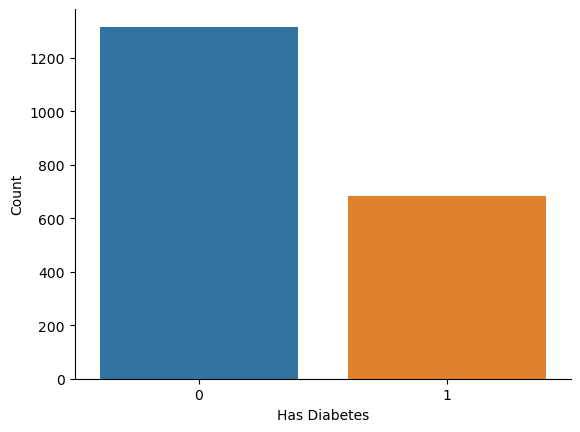

In [8]:
sns.countplot(x='Outcome', data=df)
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [9]:
df.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [10]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


## Data Cleaning

In [11]:
df.isnull().any()

Pregnancies      False
Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
DPF              False
Age              False
Outcome          False
dtype: bool

In [12]:
(df==0).sum()

Pregnancies       301
Glucose            13
BloodPressure      90
SkinThickness     573
Insulin           956
BMI                28
DPF                 0
Age                 0
Outcome          1316
dtype: int64

For some features, such as <code>Glucose</code>, <code>BloodPressure</code>, <code>SkinThickness</code>, <code>Insulin</code>, <code>BMI</code>, it is illogical for it to have value 0 so we will replace all the 0 value from all the features with *NaN*.

In [13]:
df_copy = df.copy(deep=True)

In [14]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [15]:
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [16]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.0,NaN,NaN,31.2,0.382,42,0
1998,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [17]:
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

Now we can replace the *NaN* with suitable value. To fill these *NaN* values, first the data distribution needs to be understood. We can learn about the distribution of the data by plotting histogram of the dataset.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DPF'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

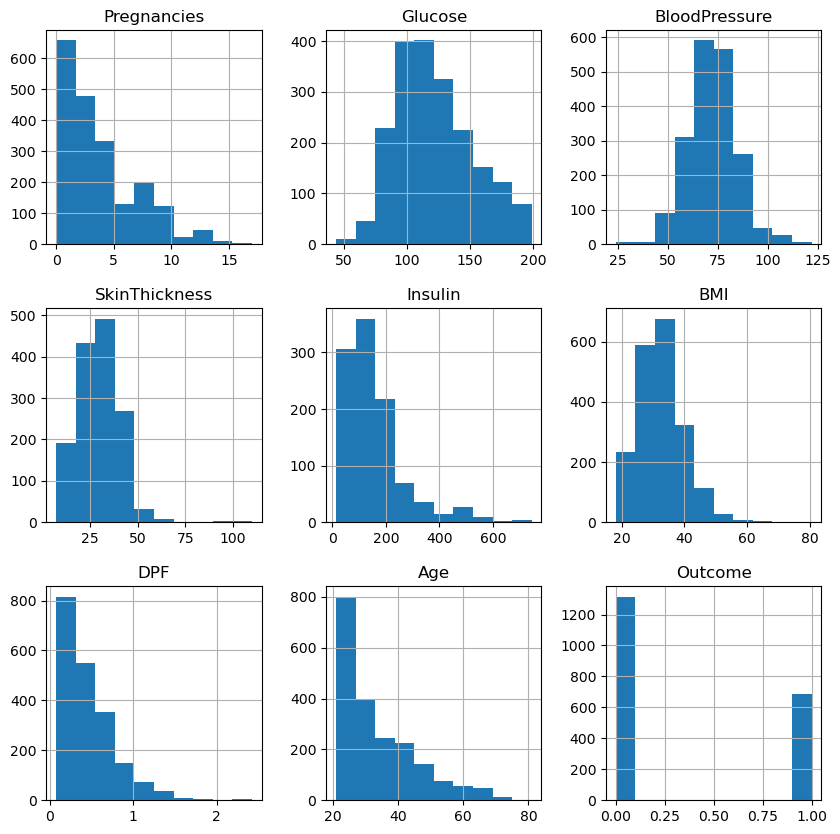

In [18]:
df_copy.hist(figsize=(10,10))

We can replace the *NaN* value by mean or median depending on the distribution:

* For **symmetric** data distribution, one can use the **mean** value for imputing missing values.
* When the data is **skewed**, it is good to consider using the **median** value for replacing the missing values.

In [19]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [20]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

Let's see the distribution of our dataset after we impute the *NaN* values.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DPF'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

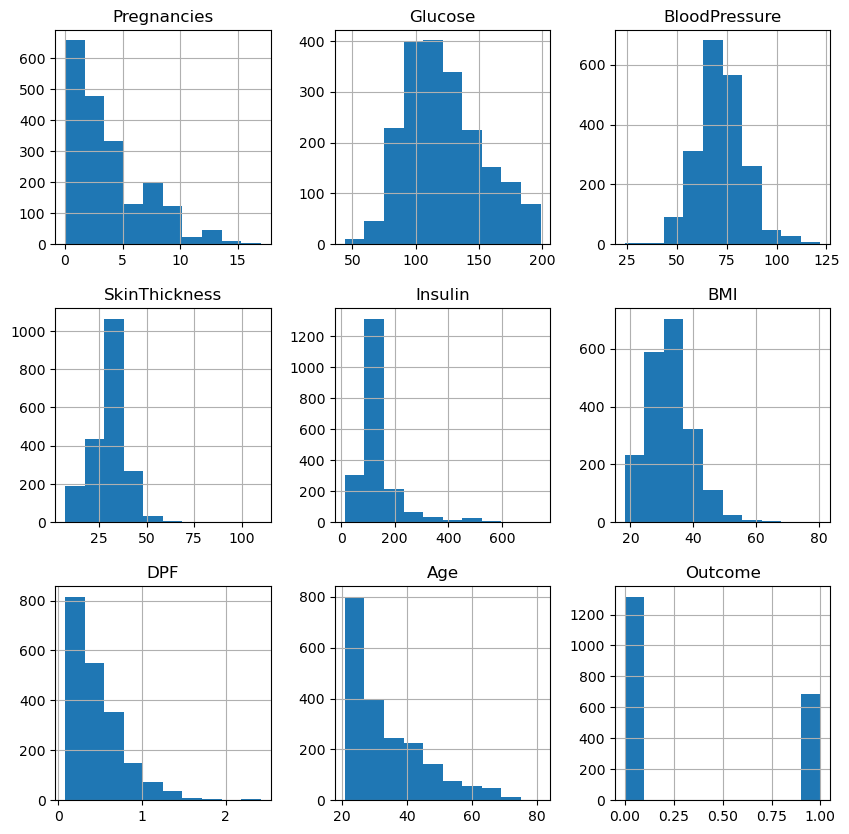

In [21]:
df_copy.hist(figsize=(10,10))

In [22]:
df_copy.duplicated().sum()

1256

In [23]:
df_copy.shape

(2000, 9)

In [24]:
df_copy.duplicated().value_counts()

True     1256
False     744
dtype: int64

In [25]:
df_copy.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

## Model Building

In [26]:
X = df_copy.drop(columns='Outcome')
y = df_copy['Outcome']

In [27]:
print(X.shape)
print(y.shape)

(2000, 8)
(2000,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train size: {}'.format(X_train.shape))
print('X_test size: {}'.format(X_test.shape))

X_train size: (1600, 8)
X_test size: (400, 8)


In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Create a function to find the best model for our analysis.

In [30]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf', 'linear']
            }
        }
    }
    
    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])


In [31]:
find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.758750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.893125
2,random_forest,{'n_estimators': 200},0.953125
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.864375


Since the **Random Forest** algorithm has the highest accuracy with 95% accuracy score, we futher fine tune the model using hyperparameter optimization.

In [33]:
scores = cross_val_score(RandomForestClassifier(n_estimators=10, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy: {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy: 94%


In [34]:
scores

array([0.934375, 0.946875, 0.9375  , 0.953125, 0.93125 ])

Let's create our Random Forest model.

In [35]:
classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

## Model Evaluation

In [36]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[271,   1],
       [  5, 123]], dtype=int64)

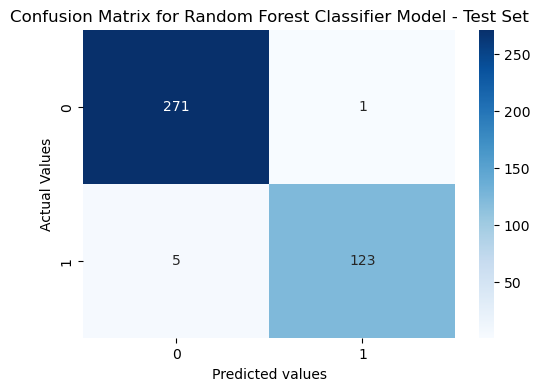

In [37]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [38]:
score = round(accuracy_score(y_test, y_pred), 4)*100
print('Accuracy score on test set: {}%'.format(score))

Accuracy score on test set: 98.5%


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       0.99      0.96      0.98       128

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



In [40]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1043,    1],
       [   4,  552]], dtype=int64)

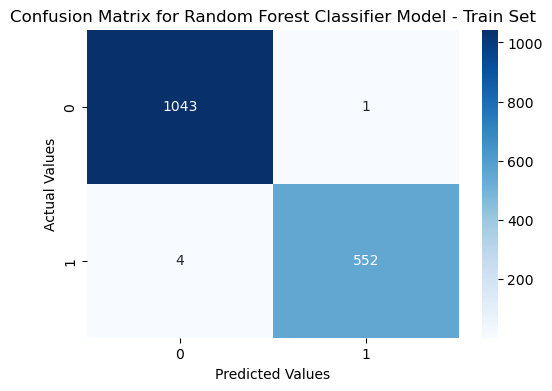

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [42]:
score = round(accuracy_score(y_train, y_train_pred), 4)*100
print('Accuracy score on train set: {}%'.format(score))

Accuracy score on train set: 99.69%


In [43]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      0.99      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [47]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


## Make Predictions

Let's create a function to predict whether the person have diabetes or not base on their data input.

In [48]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)
    
    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)
    
    return classifier.predict(x)

In [52]:
# Prediction Patient 1

prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]

if prediction:
    print('You have diabetes.')
else:
    print("Great! You don't have diabetes.")
    

Great! You don't have diabetes.


C:\Users\User\anaconda3n\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
# Prediction Patient 2

prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]

if prediction:
    print('You have diabetes.')
else:
    print("Great! You don't have diabetese.")
    

You have diabetes.


C:\Users\User\anaconda3n\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
# Prediction Patient 3

prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]

if prediction:
    print('You have diabetes.')
else:
    print("Great! You don't have diabetese.")

Great! You don't have diabetese.


C:\Users\User\anaconda3n\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
